# Supervised Learning - Artificial Intelligence

## Students' Dropout and Success

### Notebook by Henrique Pinho, João Lopes and Luís Marques

## Introduction

Machine learning is an application of artificial intelligence (AI) that provides systems the ability to automatically learn and improve from experience without being explicitly programmed. 

In this notebook, we will be using Supervised learning to predict if a student graduates or dropout.

## Required libraries

[[ go back to the top ]](#Table-of-contents)

If you don't have Python on your computer, you can use the [Anaconda Python distribution](http://continuum.io/downloads) to install most of the Python packages you need. Anaconda provides a simple double-click installer for your convenience.

This notebook uses several Python packages that come standard with the Anaconda Python distribution. The primary libraries that we'll be using are:

* **NumPy**: Provides a fast numerical array structure and helper functions.
* **pandas**: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
* **scikit-learn**: The essential Machine Learning package in Python.
* **matplotlib**: Basic plotting library in Python; most other Python plotting libraries are built on top of it.
* **Seaborn**: Advanced statistical plotting library.

To make sure you have all of the packages you need, install them with `conda`:

    conda install numpy pandas scikit-learn matplotlib seaborn
    
    conda install -c conda-forge watermark

`conda` may ask you to update some of them if you don't have the most recent version. Allow it to do so.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpt
import sklearn as sk
import seaborn as sb
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [30]:
student_data = pd.read_csv('data.csv', delimiter=';')
student_data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [31]:
student_data.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [32]:
enrolled = student_data[student_data.Target == "Enrolled"].drop(columns=['Target'])
graduated = student_data[student_data.Target == "Graduate"].drop(columns=['Target'])
dropout = student_data[student_data.Target == "Dropout"].drop(columns=['Target'])

<BarContainer object of 36 artists>

C:\Users\thelo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


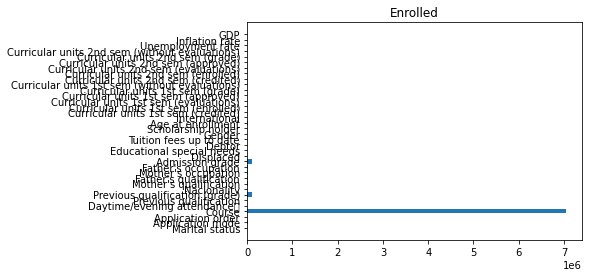

In [33]:
enrolled_dict = enrolled.sum().to_dict()
plt.title('Enrolled')
plt.barh(list(enrolled_dict.keys()), list(enrolled_dict.values()))

[2507.0, 33175.0, 4089.0, 19698201.0, 2008.0, 8905.0, 296188.7, 3855.0, 42659.0, 49702.0, 22428.0, 22916.0, 284506.9, 1324.0, 23.0, 101.0, 2180.0, 548.0, 835.0, 48120.0, 54.0, 1872.0, 14733.0, 18283.0, 13767.0, 27929.832864901316, 195.0, 1473.0, 14642.0, 17986.0, 13645.0, 28048.28233103065, 178.0, 25711.300000000003, 2646.2, 180.77000000000004]


TypeError: unhashable type: 'dict_keys'

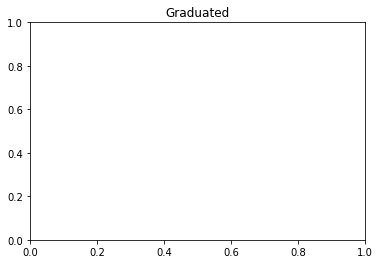

In [34]:
graduated_dict = graduated.sum().to_dict()
plt.title('Graduated')
print(list(graduated_dict.values()))
plt.barh(graduated_dict.keys(), graduated_dict.values())

<BarContainer object of 3 artists>

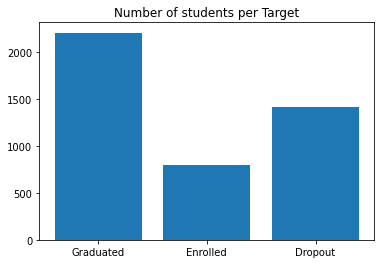

In [35]:
plt.title('Number of students per Target')
plt.bar(['Graduated', 'Enrolled', 'Dropout'], [len(graduated), len(enrolled), len(dropout)])

In [36]:
mdf = student_data.drop(student_data[student_data['Target'] == 'Enrolled'].index, inplace=False)
mdf.describe()
#student_data.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,...,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000
mean,1.184298,18.421763,1.750138,8853.980992,0.887603,4.532231,132.920606,1.828099,19.986226,22.571625,...,0.128926,0.581818,6.296419,7.763085,4.518457,10.036155,0.142149,11.630358,1.231598,-0.009256
std,0.613009,17.358595,1.333831,2068.760082,0.315897,10.024134,13.238373,6.667614,15.585278,15.275453,...,0.679111,2.022688,2.263020,3.964163,3.162376,5.481742,0.747670,2.667652,1.384911,2.259986
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.517857,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.333333,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.500000,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,6.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [37]:
graduate_data = mdf[mdf.Target == 'Graduate']
graduate_data.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,...,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000
mean,1.134903,15.018108,1.851064,8917.248076,0.909009,4.031236,134.082707,1.745134,19.311453,22.499774,...,0.088275,0.666818,6.628339,8.142146,6.177003,12.697276,0.080579,11.639339,1.197918,0.081833
std,0.525526,16.627271,1.395516,1919.444837,0.287662,9.805602,13.342121,5.790637,15.590923,15.225751,...,0.589686,2.211709,2.297197,3.245912,2.268622,2.685608,0.522872,2.601474,1.371116,2.261081
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,97.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,126.000000,1.000000,1.000000,3.000000,...,0.000000,0.000000,6.000000,6.000000,5.000000,12.166667,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,7.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,6.000000,13.000000,0.000000,11.100000,0.600000,0.790000
75%,1.000000,18.000000,2.000000,9500.000000,1.000000,1.000000,141.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,8.000000,9.000000,7.000000,14.000000,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,6.000000,9991.000000,1.000000,43.000000,184.400000,103.000000,43.000000,43.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [38]:
dropout_data = mdf[mdf.Target == 'Dropout']
dropout_data.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,...,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000
mean,1.261084,23.712878,1.593244,8755.629838,0.854328,5.311049,131.114075,1.957072,21.035186,22.683322,...,0.192118,0.449683,5.780436,7.173821,1.940183,5.899339,0.237861,11.616397,1.283955,-0.150859
std,0.721958,17.150593,1.215769,2278.779477,0.352901,10.309934,12.873354,7.838977,15.523817,15.357099,...,0.794591,1.679548,2.108249,4.817374,2.573691,6.118740,0.994210,2.768259,1.404970,2.251768
min,1.000000,1.000000,1.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,7.000000,1.000000,9085.000000,1.000000,1.000000,122.000000,1.000000,3.000000,3.000000,...,0.000000,0.000000,5.000000,5.000000,0.000000,0.000000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,18.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,22.000000,...,0.000000,0.000000,6.000000,7.000000,0.000000,0.000000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9670.000000,1.000000,1.000000,137.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,6.000000,10.000000,4.000000,11.833333,0.000000,13.900000,2.600000,1.740000
max,6.000000,53.000000,6.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,8.000000,16.000000,18.000000,25.000000,16.000000,17.714286,12.000000,16.200000,3.700000,3.510000


voltar aqui

In [39]:
graduate_sample = mdf.sample(n=1421, axis=0)
graduate_sample.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,...,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000
mean,1.186488,18.354680,1.776214,8834.768473,0.893033,4.418015,132.876144,1.705841,20.481351,22.753695,...,0.135116,0.587614,6.322308,7.745954,4.579170,10.084368,0.161858,11.579310,1.257776,0.056312
std,0.623247,17.158524,1.357513,2074.376555,0.309180,9.718492,12.739021,6.116996,15.548216,15.331221,...,0.643526,2.065195,2.301314,3.852317,3.177866,5.420827,0.793802,2.656641,1.384346,2.211648
min,1.000000,1.000000,1.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,3.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.666667,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.331250,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9500.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,13.900000,2.600000,1.790000
max,6.000000,53.000000,6.000000,9991.000000,1.000000,43.000000,178.000000,105.000000,44.000000,43.000000,...,7.000000,19.000000,23.000000,26.000000,20.000000,17.714286,12.000000,16.200000,3.700000,3.510000


In [40]:
mdf = pd.concat([graduate_sample, dropout_data])
mdf.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,...,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000
mean,1.223786,21.033779,1.684729,8795.199156,0.873681,4.864532,131.995109,1.831457,20.758269,22.718508,...,0.163617,0.518649,6.051372,7.459887,3.259676,7.991853,0.199859,11.597854,1.270866,-0.047273
std,0.675324,17.359592,1.291610,2178.952056,0.332268,10.026765,12.834396,7.030788,15.535756,15.341505,...,0.723449,1.883206,2.223083,4.370227,3.178064,6.146590,0.900248,2.712610,1.394512,2.233809
min,1.000000,1.000000,1.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,124.000000,1.000000,3.000000,3.000000,...,0.000000,0.000000,5.000000,5.250000,0.000000,0.000000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,3.000000,11.333333,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9670.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,6.000000,10.000000,6.000000,12.860000,0.000000,13.900000,2.600000,1.740000
max,6.000000,53.000000,6.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,8.000000,19.000000,23.000000,26.000000,20.000000,17.714286,12.000000,16.200000,3.700000,3.510000


C:\Users\thelo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\utils.py:95: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
C:\Users\thelo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\utils.py:660: UserWarning: Glyph 9 (	) missing from current font.
  bboxes = [l.get_window_extent() for l in labels]
C:\Users\thelo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


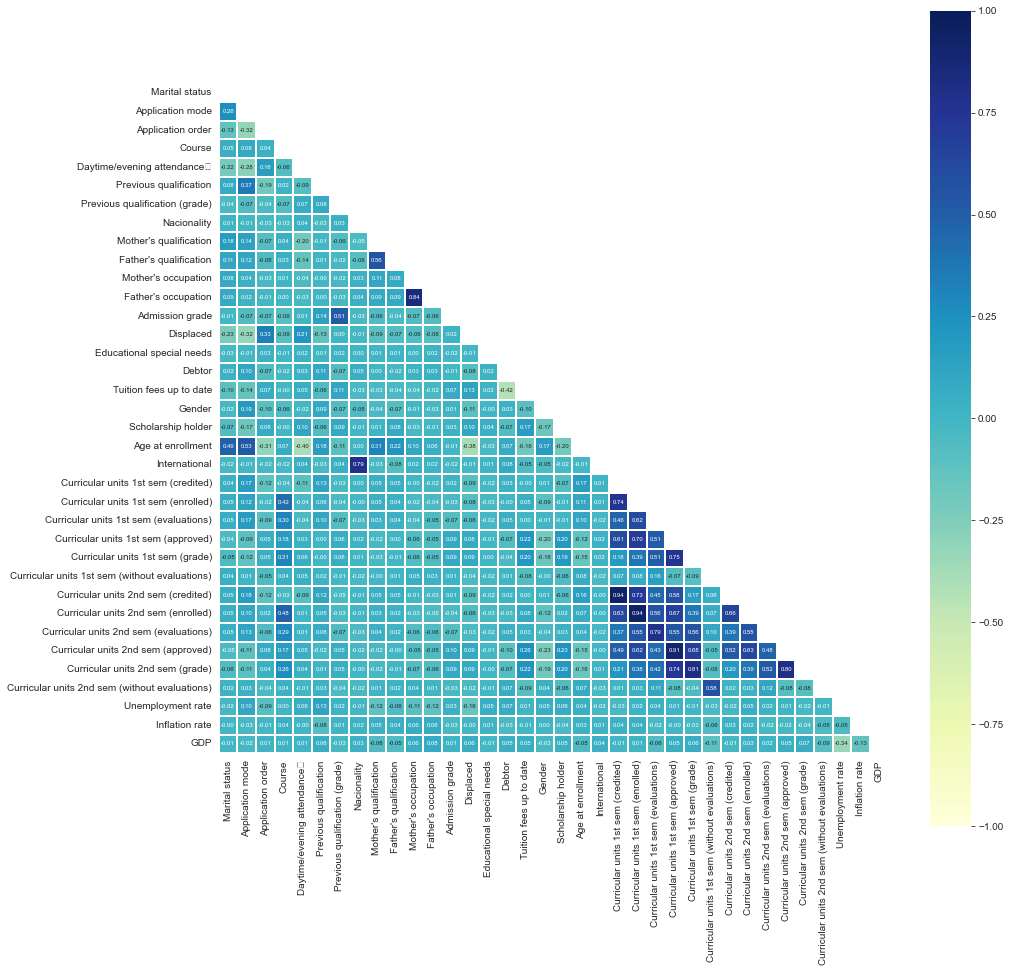

In [41]:
student_data_corr = mdf.corr()
mask = np.zeros_like(student_data_corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(15,15))
with sb.axes_style("white"):
    ax = sb.heatmap(student_data_corr, linewidths=0.1, cmap="YlGnBu", annot=True, square=True, mask=mask, fmt='.2f', annot_kws={"size": 6}, vmax=1, vmin=-1)
    plt.show()

Que dados tem muita correlaçao uns com os outros, mais de 90 faz drop

In [42]:
student_data_corr = mdf.corr().abs()

upper = student_data_corr.where(np.triu(np.ones(student_data_corr.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

old_n_columns = len(mdf.columns)

mdf.drop(to_drop, axis=1, inplace=True)

print('Dropped ' + str(old_n_columns-len(mdf.columns)) + ' columns')

Dropped 3 columns


para ir buscar data a table

In [43]:
def get_x_Y(dataset, scaler=None):
    X = dataset.drop('Target', axis=1)
    y = dataset['Target']
    
    if scaler != None:
        scaler = scaler.fit(X)
        X = scaler.transform(X)

    return X, y
        
X, y = get_x_Y(mdf)

X.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
1191,1,1,6,9500,1,1,139.0,1,1,1,...,9,7,12.041429,0,9,12.041429,0,10.8,1.4,1.74
1078,1,43,1,171,1,1,116.0,1,3,1,...,0,0,0.000000,0,0,0.000000,0,13.9,-0.3,0.79
3050,2,39,1,9556,1,1,160.0,1,37,37,...,21,5,10.900000,3,21,11.700000,1,12.7,3.7,-1.70
37,1,43,1,9147,1,1,140.0,1,37,37,...,10,1,10.000000,0,8,12.000000,2,16.2,0.3,-0.92
4249,2,43,1,9991,0,3,130.0,1,37,37,...,11,10,14.300000,0,10,14.200000,0,12.7,3.7,-1.70


para tunning

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

def tune_model(dataset, model_instance, parameter_grid, cross_validation=StratifiedKFold(n_splits=10), scaler=None, oversample=False): 
    X, y = get_x_Y(dataset, scaler)
    
    if oversample:
        steps = [('sampling', SMOTE()), ('model', model_instance)]
        model_instance = Pipeline(steps=steps)


    grid_search = GridSearchCV(
        model_instance,
        param_grid=parameter_grid,
        cv=cross_validation,
        scoring="f1_weighted"
    )

    grid_search.fit(X, y)
    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))

    grid_search.best_estimator_
    return grid_search

medir tempo

In [45]:
from sklearn.model_selection import train_test_split
import time

def measure_time(dataset, model_instance, params, scaler=None, oversample=False):
    X, y = get_x_Y(dataset, scaler)

    if oversample:
        steps = [('sampling', SMOTE()), ('model', model_instance)]
        model_instance = Pipeline(steps=steps)
    model_instance.set_params(**params)

    (X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.25, random_state=1)
    
    start = time.time()
    model_instance.fit(X_train, y_train)
    end = time.time()
    return end - start

Serapar casos teste e casos treino

In [46]:
columns = student_data.columns

col_list = list(columns)

all_inputs = student_data[col_list[:-1]].values

all_labels = student_data['Target'].values

(training_inputs,
testing_inputs,
training_classes,
testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)



Decision Tree

In [47]:
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier()


parameters = {'criterion': ['gini', 'entropy'],
                'splitter': ['best', 'random'],
                'max_depth': [8],
            }



decision_tree_w_parameters = GridSearchCV(decision_tree_classifier,
                            param_grid=parameters)


decision_tree_w_parameters.fit(training_inputs, training_classes)

with open('decision_tree.dot', 'w') as out_file:
    out_file = tree.export_graphviz(decision_tree_w_parameters.best_estimator_ , out_file=out_file)

decision_tree_w_parameters.score(testing_inputs, testing_classes)


0.755877034358047

In [48]:
from sklearn.tree import DecisionTreeClassifier

parameter_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': range(1, 7),
    'max_features': range(1, 7)
}

dt_original = tune_model(student_data, DecisionTreeClassifier(), parameter_grid)

Best score: 0.6980131294820958
Best parameters: {'criterion': 'gini', 'max_depth': 6, 'max_features': 6, 'splitter': 'best'}


In [49]:
dt = tune_model(mdf, DecisionTreeClassifier(), parameter_grid)

Best score: 0.8362847566229945
Best parameters: {'criterion': 'entropy', 'max_depth': 6, 'max_features': 6, 'splitter': 'best'}


In [50]:
parameter_grid = {
    'model__criterion': ['gini', 'entropy'],
    'model__splitter': ['best', 'random'],
    'model__max_depth': range(1, 7),
    'model__max_features': range(1, 7)
}

dt_os_fs = tune_model(mdf, DecisionTreeClassifier(), parameter_grid, oversample=True)

Best score: 0.8288420830003889
Best parameters: {'model__criterion': 'gini', 'model__max_depth': 6, 'model__max_features': 6, 'model__splitter': 'best'}


SVM

In [58]:
# Importing necessary libraries
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

import numpy as nps

Text(0.5, 1.0, 'Average score: 0.6928230788238201')

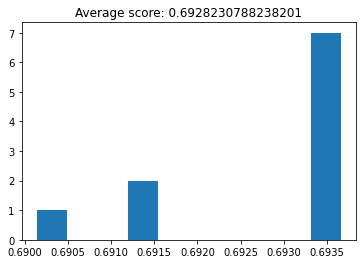

In [59]:
X, y = get_x_Y(mdf)

# Without standardizing the data:
svc = SVC()

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(svc, X, y, cv=10)

plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

Text(0.5, 1.0, 'Average score: 0.6928230788238201')

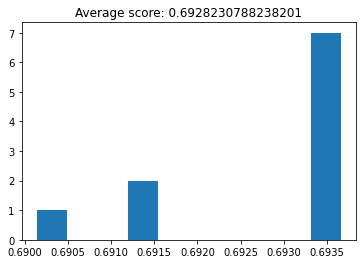

In [60]:
X, y = get_x_Y(mdf)

# Without standardizing the data:
svc = SVC()

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(svc, X, y, cv=10)

plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

umas merdas

In [61]:
parameter_grid = {
    'C': [1, 10, 50], 
    'gamma': [0.001, 0.0001],
    # 'kernel': ['linear', 'poly', 'rbf']
    'kernel': ['linear', 'rbf', 'sigmoid']
}

# No oversampling / No feature selection
svc_original = tune_model(student_data, SVC(), parameter_grid, scaler=StandardScaler())

Best score: 0.7572102795860735
Best parameters: {'C': 50, 'gamma': 0.001, 'kernel': 'rbf'}


In [64]:
# No oversampling / Feature selection
svc = tune_model(mdf, SVC(), parameter_grid, scaler=StandardScaler())

Best score: 0.8842607552048201
Best parameters: {'C': 50, 'gamma': 0.001, 'kernel': 'rbf'}


In [ ]:
parameter_grid = {
    'model__C': [1, 10, 50], 
    'model__gamma': [0.001, 0.0001],
    # 'kernel': ['linear', 'poly', 'rbf']
    'model__kernel': ['linear', 'rbf', 'sigmoid']
}

# Oversampling / Feature Selection
svc_os_fs = tune_model(mdf, SVC(), parameter_grid, scaler=StandardScaler(), oversample=True)

K-nearest neighbours (KNN)

''

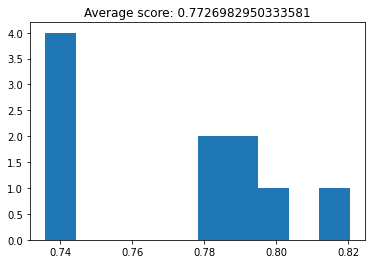

In [65]:
# Without standardizing the data
from sklearn import neighbors

X, y = get_x_Y(mdf)

knn = neighbors.KNeighborsClassifier()

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(knn, X, y, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))
;

''

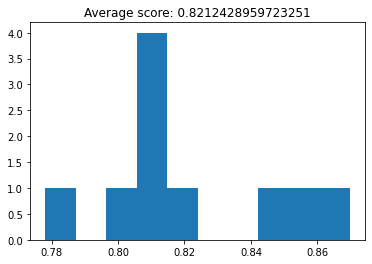

In [66]:
# Standardizing the data
standardized_X, y = get_x_Y(mdf, scaler=StandardScaler())

knn = neighbors.KNeighborsClassifier()

cv_scores = cross_val_score(knn, standardized_X, y, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))
;

In [67]:
parameter_grid =  {
    'n_neighbors':[4,5,6,7,10,15],
    'leaf_size':[5, 10, 15, 20, 50, 100],
    'n_jobs':[-1],
    'algorithm':['auto']
}

# No oversampling / No feature selection
knn = neighbors.KNeighborsClassifier()
knn_original = tune_model(student_data, knn, parameter_grid, scaler=StandardScaler())

Best score: 0.6880458285094058
Best parameters: {'algorithm': 'auto', 'leaf_size': 5, 'n_jobs': -1, 'n_neighbors': 7}


In [68]:
# No oversampling / Feature selection
knn = neighbors.KNeighborsClassifier()
knn = tune_model(mdf, knn, parameter_grid, scaler=StandardScaler())

Best score: 0.8330983341942118
Best parameters: {'algorithm': 'auto', 'leaf_size': 5, 'n_jobs': -1, 'n_neighbors': 15}


In [69]:
parameter_grid = {
    'model__n_neighbors':[4,5,6,7,10,15],
    'model__leaf_size':[5, 10, 15, 20, 50, 100],
    'model__n_jobs':[-1],
    'model__algorithm':['auto']
}

# Oversampling / Feature Selection
knn_os_fs = tune_model(mdf, neighbors.KNeighborsClassifier(), parameter_grid, scaler=StandardScaler(), oversample=True)

Best score: 0.8123365957713482
Best parameters: {'model__algorithm': 'auto', 'model__leaf_size': 20, 'model__n_jobs': -1, 'model__n_neighbors': 4}


Naive Bayes

In [70]:
from sklearn.naive_bayes import GaussianNB

parameter_grid = {}

# No oversampling / No feature selection
nb_original = tune_model(student_data, GaussianNB(), parameter_grid, scaler=StandardScaler())

Best score: 0.6642678607484849
Best parameters: {}


In [71]:
# No oversampling / Feature selection
nb = tune_model(mdf, GaussianNB(), parameter_grid, scaler=StandardScaler())

Best score: 0.7801393141530831
Best parameters: {}


In [72]:
parameter_grid = {}

# Oversampling / Feature Selection
nb_os_fs = tune_model(mdf, GaussianNB(), parameter_grid, scaler=StandardScaler(), oversample=True)

Best score: 0.7793501262758717
Best parameters: {}


Random Forest Classifier

In [73]:
from sklearn.ensemble import RandomForestClassifier

# parameter_grid = {
#     'n_estimators': [100,200],
#     'max_depth': [8, 9, 10],
#     'n_jobs': [-1], #Use all cores
#     'max_features': ['auto', 'sqrt'],
#     'criterion': ['gini', 'entropy']
# }

parameter_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [5, 10, 15],
    'n_jobs': [-1], #Use all cores
    'max_features': ['auto'],
    'criterion': ['gini', 'entropy']
}

# No oversampling / No feature selection
rfc_original = tune_model(student_data, RandomForestClassifier(), parameter_grid)

C:\Users\thelo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\thelo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\thelo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\lo

Best score: 0.7586214661420634
Best parameters: {'criterion': 'gini', 'max_depth': 15, 'max_features': 'auto', 'n_estimators': 200, 'n_jobs': -1}


In [74]:
# No oversampling / Feature selection
rfc = tune_model(mdf, RandomForestClassifier(), parameter_grid)

C:\Users\thelo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\thelo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\thelo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\lo

Best score: 0.9143139026088585
Best parameters: {'criterion': 'entropy', 'max_depth': 15, 'max_features': 'auto', 'n_estimators': 50, 'n_jobs': -1}


In [75]:
parameter_grid = {
    'model__n_estimators': [10, 50, 100, 200],
    'model__max_depth': [5, 10, 15],
    'model__n_jobs': [-1], #Use all cores
    'model__max_features': ['auto'],
    'model__criterion': ['gini', 'entropy']
}

# Oversampling / Feature Selection
rfc_os_fs = tune_model(mdf, RandomForestClassifier(), parameter_grid, oversample=True)

C:\Users\thelo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\thelo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\thelo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\lo

Best score: 0.9185880998989813
Best parameters: {'model__criterion': 'entropy', 'model__max_depth': 15, 'model__max_features': 'auto', 'model__n_estimators': 100, 'model__n_jobs': -1}


C:\Users\thelo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


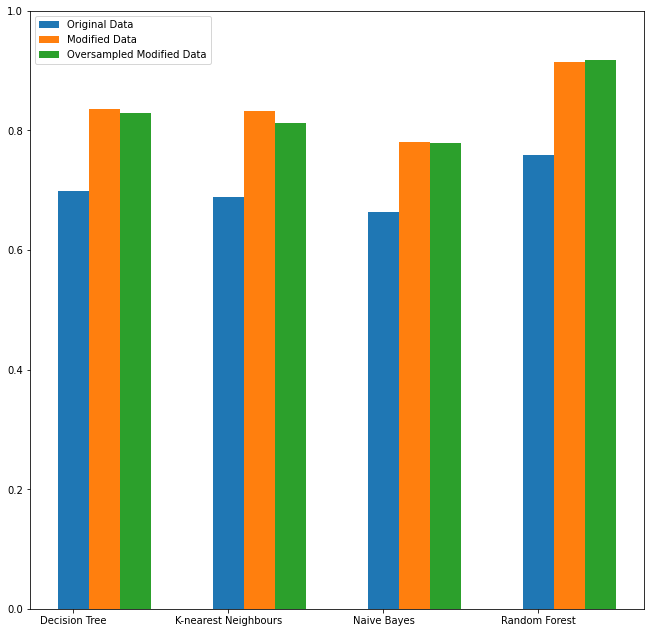

In [78]:
scores = {
    "Decision Tree" : [dt_original, dt, dt_os_fs],
    #"SVC" : [svc_original, svc, svc_os_fs],
    "K-nearest Neighbours" : [knn_original, knn, knn_os_fs],
    "Naive Bayes" : [nb_original, nb, nb_os_fs],
    "Random Forest" : [rfc_original, rfc, rfc_os_fs]
}

labels = ["Original Data","Modified Data", "Oversampled Modified Data"]

ind = np.arange(4)

plt.figure(figsize=(11,11))
plt.bar(ind, [i[0].best_score_ for i in scores.values()], 0.2)
ax = plt.bar(ind + 0.2, [i[1].best_score_ for i in scores.values()], 0.2)
ax = plt.bar(ind + 0.4, [i[2].best_score_ for i in scores.values()], 0.2)
plt.xticks(ind, scores.keys())
plt.legend(labels,loc=2)
plt.ylim(0, 1)
plt.show()

analyzing times

C:\Users\thelo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\thelo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\thelo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\lo

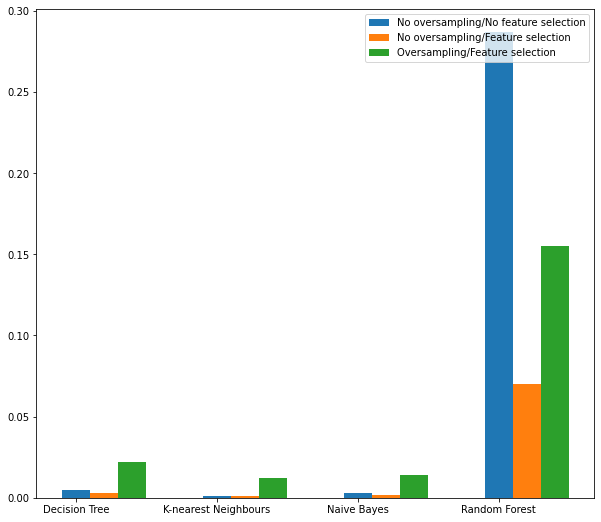

In [82]:
times = {
    "Decision Tree" : [
        measure_time(student_data, DecisionTreeClassifier(), dt_original.best_params_),
        measure_time(mdf, DecisionTreeClassifier(), dt.best_params_),
        measure_time(mdf, DecisionTreeClassifier(), dt_os_fs.best_params_, oversample=True)
    ],
    "K-nearest Neighbours" : [
        measure_time(student_data, neighbors.KNeighborsClassifier(), knn_original.best_params_, scaler=StandardScaler()),
        measure_time(mdf, neighbors.KNeighborsClassifier(), knn.best_params_, scaler=StandardScaler()),
        measure_time(mdf, neighbors.KNeighborsClassifier(), knn_os_fs.best_params_, oversample=True, scaler=StandardScaler())
    ],
    "Naive Bayes" : [
        measure_time(student_data, GaussianNB(), nb_original.best_params_, scaler=StandardScaler()),
        measure_time(mdf, GaussianNB(), nb.best_params_, scaler=StandardScaler()),
        measure_time(mdf, GaussianNB(), nb_os_fs.best_params_, oversample=True, scaler=StandardScaler())
    ],
    "Random Forest" : [
        measure_time(student_data, RandomForestClassifier(), rfc_original.best_params_),
        measure_time(mdf, RandomForestClassifier(), rfc.best_params_),
        measure_time(mdf, RandomForestClassifier(), rfc_os_fs.best_params_, oversample=True)
    ]
}

labels = ["No oversampling/No feature selection","No oversampling/Feature selection", "Oversampling/Feature selection"]

ind = np.arange(4)

plt.figure(figsize=(10,9))
plt.bar(ind, [i[0] for i in times.values()], 0.2)
ax = plt.bar(ind + 0.2, [i[1] for i in times.values()], 0.2)
ax = plt.bar(ind + 0.4, [i[2] for i in times.values()], 0.2)
plt.xticks(ind, times.keys())
plt.legend(labels,loc=1)

# plt.ylim(0.7, 1)
plt.show()

conclusao

somos burros